# PSET 1

## Import the necessary dependencies

In [51]:
from sys import platform
import sys
import subprocess
# Ignore the pip dependency error
subprocess.check_call([sys.executable, "-m", "pip", "install", "opencv-python"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
subprocess.check_call([sys.executable, "-m", "pip", "install", "scipy"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
subprocess.check_call([sys.executable, "-m", "pip", "install", "sparseqr"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2d
import scipy.sparse as sps
from PIL import Image

# # Package for fast equation solving
print(platform)

# ! pip3 install sparseqr
import sparseqr

darwin


In [ ]:
# Get images for plots (images are also included in the pset folder)
# ! wget http://6.869.csail.mit.edu/fa19/psets19/pset1/img1.png
# ! wget http://6.869.csail.mit.edu/fa19/psets19/pset1/img2.png
# ! wget http://6.869.csail.mit.edu/fa19/psets19/pset1/img3.png
# ! wget http://6.869.csail.mit.edu/fa19/psets19/pset1/img4.png
# ! wget http://6.869.csail.mit.edu/sp23/pset1/pset_1_reference.png

--2025-02-12 08:55:17--  http://6.869.csail.mit.edu/fa19/psets19/pset1/img1.png
Resolving 6.869.csail.mit.edu (6.869.csail.mit.edu)... 128.30.100.221
Connecting to 6.869.csail.mit.edu (6.869.csail.mit.edu)|128.30.100.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96264 (94K) [image/png]
Saving to: ‘img1.png.2’

img1.png.2          100%[===================>]  94.01K  --.-KB/s    in 0.02s   

2025-02-12 08:55:17 (5.82 MB/s) - ‘img1.png.2’ saved [96264/96264]

--2025-02-12 08:55:17--  http://6.869.csail.mit.edu/fa19/psets19/pset1/img2.png
Resolving 6.869.csail.mit.edu (6.869.csail.mit.edu)... 128.30.100.221
Connecting to 6.869.csail.mit.edu (6.869.csail.mit.edu)|128.30.100.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76847 (75K) [image/png]
Saving to: ‘img2.png.2’

img2.png.2          100%[===================>]  75.05K  --.-KB/s    in 0.02s   

2025-02-12 08:55:17 (4.79 MB/s) - ‘img2.png.2’ saved [76847/76847]

--2025-02-12 08:

## Define the Sparse Matrix

In [53]:
def sparseMatrix(i, j, Aij, imsize):
    """ Build a sparse matrix containing 2D linear neighborhood operators
    Input:
        Aij = [ni, nj, nc] nc: number of neighborhoods with contraints
        i: row index
        j: column index
        imsize: [nrows ncols]
    Returns:
        A: a sparse matrix. Each row contains one 2D linear operator
    """
    ni, nj, nc = Aij.shape
    nij = ni*nj

    a = np.zeros((nc*nij))
    m = np.zeros((nc*nij))
    n = np.zeros((nc*nij))
    grid_range = np.arange(-(ni-1)/2, 1+(ni-1)/2)
    jj, ii = np.meshgrid(grid_range, grid_range)
    ii = ii.reshape(-1,order='F')
    jj = jj.reshape(-1,order='F')


    k = 0
    for c in range(nc):
        # Get matrix index
        x = (i[c]+ii) + (j[c]+jj)*nrows
        a[k:k+nij] = Aij[:,:,c].reshape(-1,order='F')
        m[k:k+nij] = c
        n[k:k+nij] = x

        k += nij

    m = m.astype(np.int32)
    n = n.astype(np.int32)
    A = sps.csr_matrix((a, (m,  n)))

    return A

## Define world parameters and plot the edges

ground (256, 373) [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


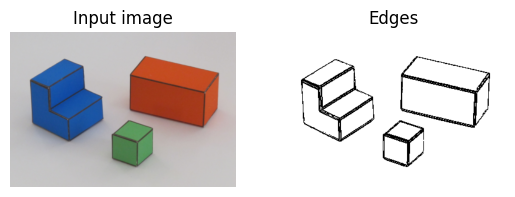

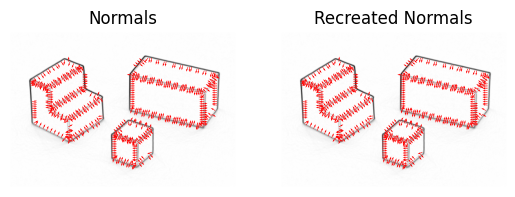

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.0].


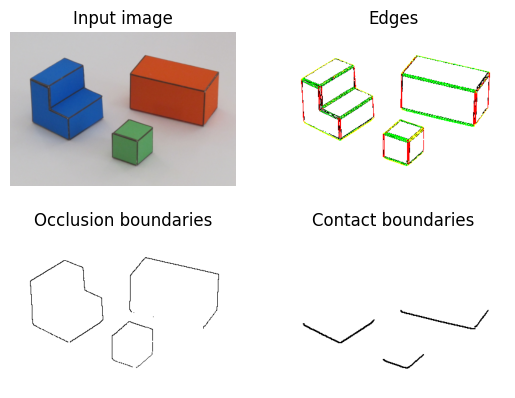

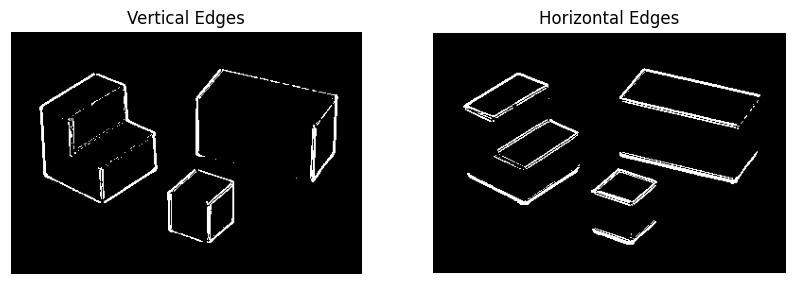

In [54]:
# World parameters
theta = 35*math.pi/180

img = cv2.imread('img1.png')
img = img[:, :, ::-1].astype(np.float32)

nrows, ncols, colors = img.shape
ground = (np.min(img, axis=2) > 110).astype(np.float32)
print('ground', ground.shape, ground)
foreground = (ground == 0).astype(np.float32)

m = np.mean(img, 2)
kern = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
dmdx = conv2d(m, kern, 'same')
dmdy = conv2d(m, kern.transpose(), 'same')

mag = np.sqrt(dmdx**2 + dmdy**2)
mag[0, :] = 0
mag[-1, :] = 0
mag[:, 0] = 0
mag[:, -1] = 0

edges = mag >= 30
edges = edges * foreground

## Occlusion and contact edges

####################################################################
### COMPLETE THE CODE BELOW (TODOs) AND COPY IT INTO YOUR REPORT ###
####################################################################
pi = math.pi
edge_orientation = np.arctan2(dmdy, dmdx) #TODO
threshold = 60  # Adjust based on image contrast
vertical_edges = np.abs(conv2d(m, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32), 'same')) > threshold
horizontal_edges = np.abs(conv2d(m, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32), 'same')) > threshold

####################################################################
###################### STOP COPYING HERE ###########################
####################################################################

kern = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
horizontal_ground_to_foreground_edges = (conv2d(ground, kern, 'same'))>0
horizontal_foreground_to_ground_edges = (conv2d(foreground, kern, 'same'))>0
vertical_ground_to_foreground_edges = vertical_edges*np.abs(conv2d(ground, kern.transpose(), 'same'))>0


occlusion_edges = edges*(vertical_ground_to_foreground_edges + horizontal_ground_to_foreground_edges)
contact_edges   = horizontal_edges*(horizontal_foreground_to_ground_edges)


E = np.concatenate([vertical_edges[:,:,None],
                    horizontal_edges[:,:,None],
                    np.zeros(occlusion_edges.shape)[:,:,None]], 2)


# Plot
plt.figure()
plt.subplot(2,2,1)
plt.imshow(img.astype(np.uint8))
plt.axis('off')
plt.title('Input image')
plt.subplot(2,2,2)
plt.imshow(edges == 0, cmap='gray')
plt.axis('off')
plt.title('Edges')

# Normals
K = 3
ey, ex = np.where(edges[::K, ::K])
ex *= K
ey *= K
plt.figure()
plt.subplot(2,2,3)
plt.imshow(np.max(mag)-mag, cmap='gray')
dxe = dmdx[::K, ::K][edges[::K, ::K] > 0]
dye = dmdy[::K, ::K][edges[::K, ::K] > 0]
n = np.sqrt(dxe**2 + dye**2)
dxe = dxe/n
dye = dye/n
plt.quiver(ex, ey, dxe, -dye, color='r')
plt.axis('off')
plt.title('Normals')


plt.subplot(2,2,4)
plt.imshow(np.max(mag)-mag, cmap='gray')
# Recreate the normals plot using sin and cos
# Note: -dye_mod  used in plot because 0 is upper right corner here
dxe_mod = nx = np.cos(edge_orientation[::K, ::K][edges[::K, ::K] > 0])
dye_mod = ny = np.sin(edge_orientation[::K, ::K][edges[::K, ::K] > 0])
plt.quiver(ex, ey, dxe_mod, -dye_mod, color='r') # at ex, ey location, plot dx, -dy
plt.axis('off')
plt.title('Recreated Normals')
plt.show()


# Edges and boundaries
plt.figure()
plt.subplot(2,2,1)
plt.imshow(img.astype(np.uint8))
plt.axis('off')
plt.title('Input image')


plt.subplot(2,2,2)
plt.imshow(E+(edges == 0)[:, :, None])
plt.axis('off')
plt.title('Edges')


plt.subplot(2,2,3)
plt.imshow(1-(occlusion_edges>0), cmap='gray')
plt.axis('off')
plt.title('Occlusion boundaries')

plt.subplot(2,2,4)
plt.imshow(1-contact_edges, cmap='gray')
plt.axis('off')
plt.title('Contact boundaries')

## MY CODE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(vertical_edges, cmap='gray')
plt.axis('off')
plt.title('Vertical Edges')

plt.subplot(1, 2, 2)
plt.imshow(horizontal_edges, cmap='gray')
plt.axis('off')
plt.title('Horizontal Edges')

plt.show()


## Populate edge variables


In [55]:
Nconstraints = nrows * ncols * 20
Aij = np.zeros((3, 3, Nconstraints))
b = np.zeros((Nconstraints, 1))

# Indices and counters
ii = np.zeros((Nconstraints, 1))
jj = np.zeros((Nconstraints, 1))
global c
c = 0

# These will always be updated with the current indices
def update_indices():
    global c
    ii[c] = i
    jj[c] = j
    c += 1


# Create linear contraints
for i in range(1, nrows - 1):
    for j in range(1, ncols - 1):
        # Y = 0
        if ground[i, j]:
            Aij[:, :, c] = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
            b[c] = 0
            update_indices()
        else:
            # Check if current neighborhood touches an edge
            edgesum = np.sum(edges[i - 1 : i + 2, j - 1 : j + 2])
            # Check if current neighborhood touches ground pixels
            groundsum = np.sum(ground[i - 1 : i + 2, j - 1 : j + 2])
            # Check if current neighborhood touches vertical pixels
            verticalsum = np.sum(vertical_edges[i - 1 : i + 2, j - 1 : j + 2])
            # Check if current neighborhood touches horizontal pixels
            horizontalsum = np.sum(horizontal_edges[i - 1 : i + 2, j - 1 : j + 2])

            #######################################################################
            ##### COMPLETE THE CODE BELOW (TODOs) AND COPY IT INTO YOUR REPORT ####
            ### AFTER COMPLETING THE CODE, RUN THE CELL BELOW TO GENERATE PLOTS ###
            #######################################################################

            # TODO: edge orientation (average of edge pixels in current neighborhood)
            # Populate Aij, ii, jj, b, and c using theta, edge_orientation, and
            # the constraint/transform matrices you derived in the written segment

            # Contact edge: Y = 0
            # Requires: a transform matrix
            # TODO: Complete the code
            if contact_edges[i, j]:
                Aij[:, :, c] = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
                b[c] = 0
                update_indices()

            # Vertical edge: dY/dy = 1/cos(theta)
            # Requires: a transform matrix, theta
            # The 1/8 is for normalization
            # TODO: Complete the code
            if verticalsum > 0 and groundsum == 0:
                # Transform matrix for vertical derivative
                Aij[:, :, c] = (1 / 8) * np.array([[0, -1, 0], [0, 2, 0], [0, -1, 0]])
                b[c] = 1 / np.cos(theta)
                update_indices()

            # Horizontal edge: dY/dt = 0
            # Note: You'll have to express t using other variables
            # Requires: a transform matrix, i, j, edge_orientation
            # TODO: Complete the code
            if horizontalsum > 0 and groundsum == 0 and verticalsum == 0:
                # Transform matrix using edge orientation
                dx = np.cos(edge_orientation[i, j])
                dy = np.sin(edge_orientation[i, j])
                Aij[:, :, c] = (1 / 8) * np.array(
                    [[-dx, -dy, -dx], [2 * dx, 2 * dy, 2 * dx], [-dx, -dy, -dx]]
                )
                b[c] = 0
                update_indices()

            # Second derivative = 0 (weighted by 0.1 to reduce constraint strength)
            # Requires: multiple transform matrices
            # TODO: Complete the code
            if groundsum == 0:
                Aij[:, :, c] = 0.1 * np.array([[0, 0, 0], [1, -2, 1], [0, 0, 0]])
                b[c] = 0
                update_indices()

                # d²Y/dy²
                Aij[:, :, c] = 0.1 * np.array([[0, 1, 0], [0, -2, 0], [0, 1, 0]])
                b[c] = 0
                update_indices()

                # d²Y/dxdy (mixed partial)
                Aij[:, :, c] = 0.1 * np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
                b[c] = 0
                update_indices()

            ####################################################################
            ###################### STOP COPYING HERE ###########################
            ####################################################################

# Solve for constraints
ii = ii[:c]
jj = jj[:c]
Aij = Aij[:, :, :c]
b = b[:c]
A = sparseMatrix(ii, jj, Aij, nrows)
Y = sparseqr.solve(A, b)

# Transform vector into image
Y = np.reshape(Y, [nrows, ncols], order="F")

# Recover 3D world coordinates
x, y = np.meshgrid(np.arange(ncols), np.arange(nrows))
x = x.astype(np.float32)
y = y.astype(np.float32)
x -= nrows / 2
y -= ncols / 2

# Final coordinates
X = x
Z = Y * np.cos(theta) / np.sin(theta) - y / np.sin(theta)
Y = -Y
Y = np.maximum(Y, 0)

E = occlusion_edges.astype(np.float32)
E[E > 0] = np.nan
Z = Z + E  #  remove occluded edges


### Generate Plots

Don't forget to screenshot the plots and include them into your report!

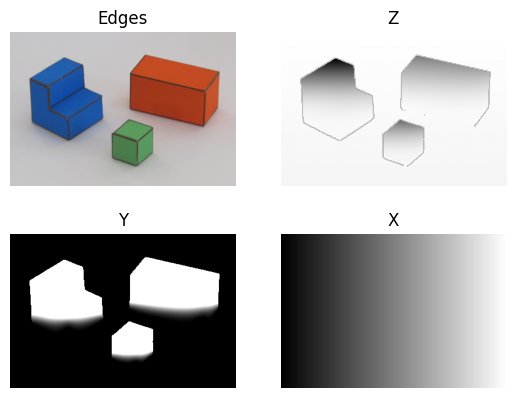

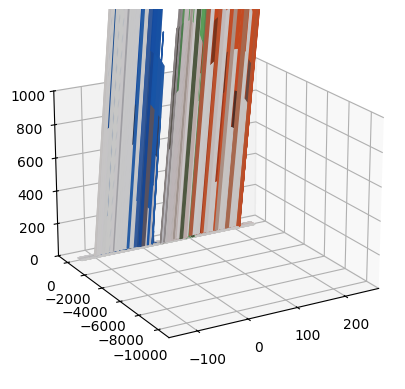

In [56]:
# Visualize solution
plt.figure()
plt.subplot(2,2,1)
plt.imshow(img[1:-1, 1:-1].astype(np.uint8))
plt.axis('off')
plt.title('Edges')

plt.subplot(2,2,2)
plt.imshow(Z[1:-1, 1:-1], cmap='gray')
plt.axis('off')
plt.title('Z')

plt.subplot(2,2,3)
plt.imshow(Y[1:-1, 1:-1], cmap='gray', vmin=0, vmax=175)
plt.axis('off')
plt.title('Y')

plt.subplot(2,2,4)
plt.imshow(X[1:-1, 1:-1], cmap='gray')
plt.axis('off')
plt.title('X')

# 3D projection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0, 1000)

# TODO for Problem 5
# Rerun the script with at least two more of the provided images and for each
# image try at least two different view angles.
# Include the generated plots in your report (under Problem 5).
# Note that we expect results to be quite brittle -- in answering Problem 6,
# think about the strong assumptions that this approach makes.
# We'll see more robust methods for similar problems later in the course

# Specify here the angle you want to see
ax.view_init(20, -120)
ax.plot_surface(X,Z,Y, facecolors=img/255., shade=False)

### Reference solution
Yours should render on a white background (note that the outline on Z is transparency) but be identical otherwise

**Uploading the reference will be considered an honor code violation**

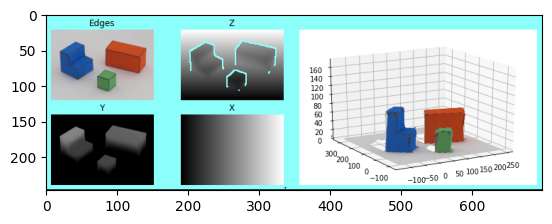

In [57]:
plt.imshow(cv2.cvtColor(cv2.imread('pset_1_reference.png'), cv2.COLOR_BGR2RGB))
plt.show()